/tmp/ipython-input-3-2300065555.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


<Figure size 1000x600 with 0 Axes>

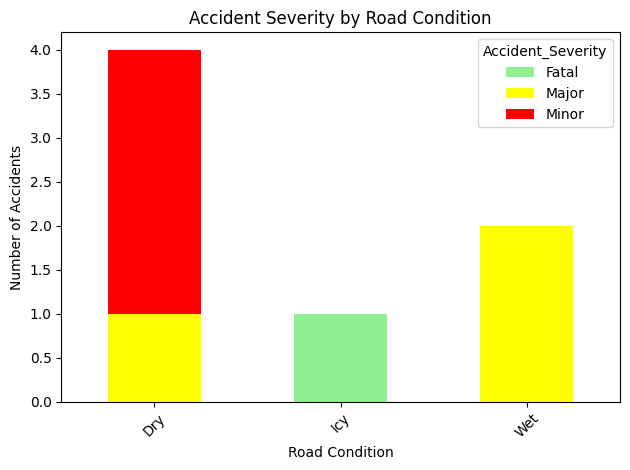

<Figure size 1000x600 with 0 Axes>

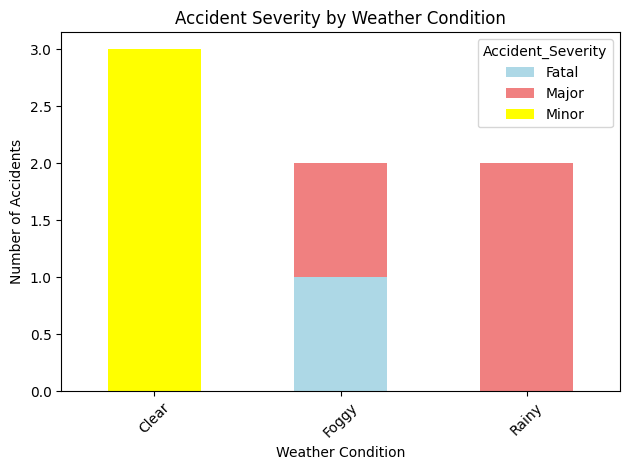

/tmp/ipython-input-3-2300065555.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


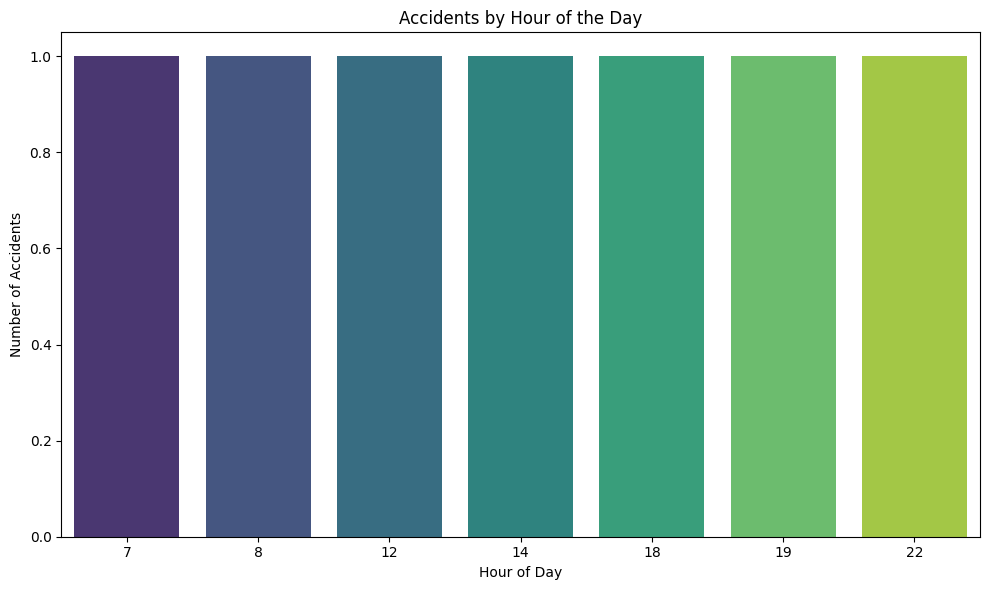

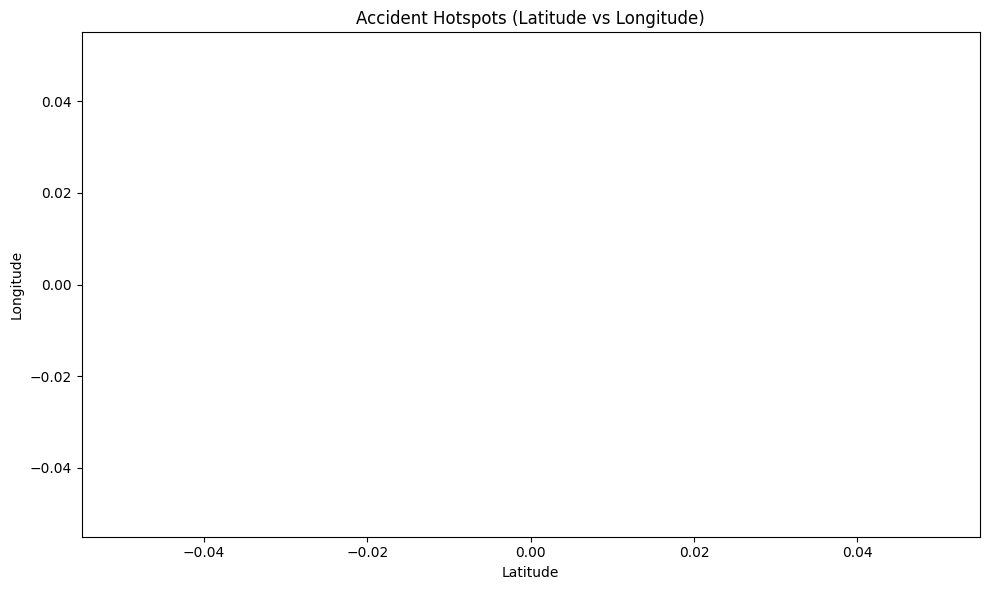

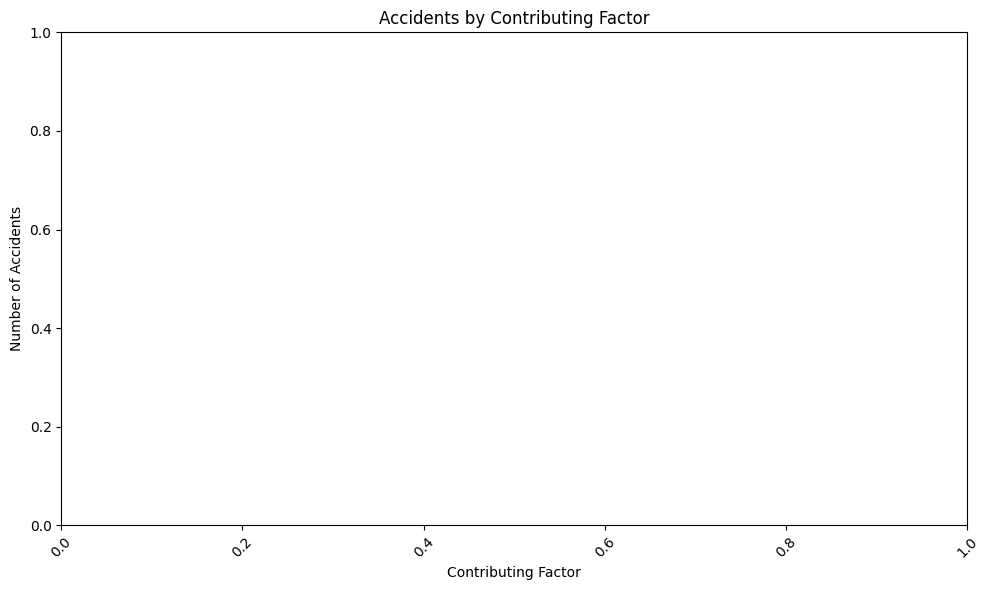

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('TASK04 DATASET.csv')


df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df['Hour'] = df['Datetime'].dt.hour


road_condition_severity = df.groupby('Road_Condition')['Accident_Severity'].value_counts().unstack().fillna(0)
weather_severity = df.groupby('Weather')['Accident_Severity'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
road_condition_severity.plot(kind='bar', stacked=True, color=['lightgreen', 'yellow', 'red'])
plt.title('Accident Severity by Road Condition')
plt.ylabel('Number of Accidents')
plt.xlabel('Road Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
weather_severity.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral', 'yellow'])
plt.title('Accident Severity by Weather Condition')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

df['Location'] = df['Location'].astype(str)
df = df[df['Location'].str.contains(',')]
plt.scatter(df['Location'].str.split(',').apply(lambda x: float(x[0])),
            df['Location'].str.split(',').apply(lambda x: float(x[1])), c='red', alpha=0.5)
plt.title('Accident Hotspots (Latitude vs Longitude)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Contributing_Factor', data=df, palette='Set2')
plt.title('Accidents by Contributing Factor')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()